## Homework 2

* Import Boston Dataset from sklearn dataset class.
* Explore and analyse raw data.
* Do preprocessing for regression.
* Split your dataset into train and test test (0.7 for train and 0.3 for test).
* Try Ridge and Lasso Regression models with at least 5 different alpha value for each.
* Evaluate the results of all models and choose the best performing model.

In [15]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [61]:
# Import boston dataset and convert it into pandas dataframe

X , y = load_boston(return_X_y=True)
df_boston = pd.DataFrame(X, columns = load_boston().feature_names)

In [62]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [63]:
# Check duplicate values and missing data
df_boston.duplicated().sum()

0

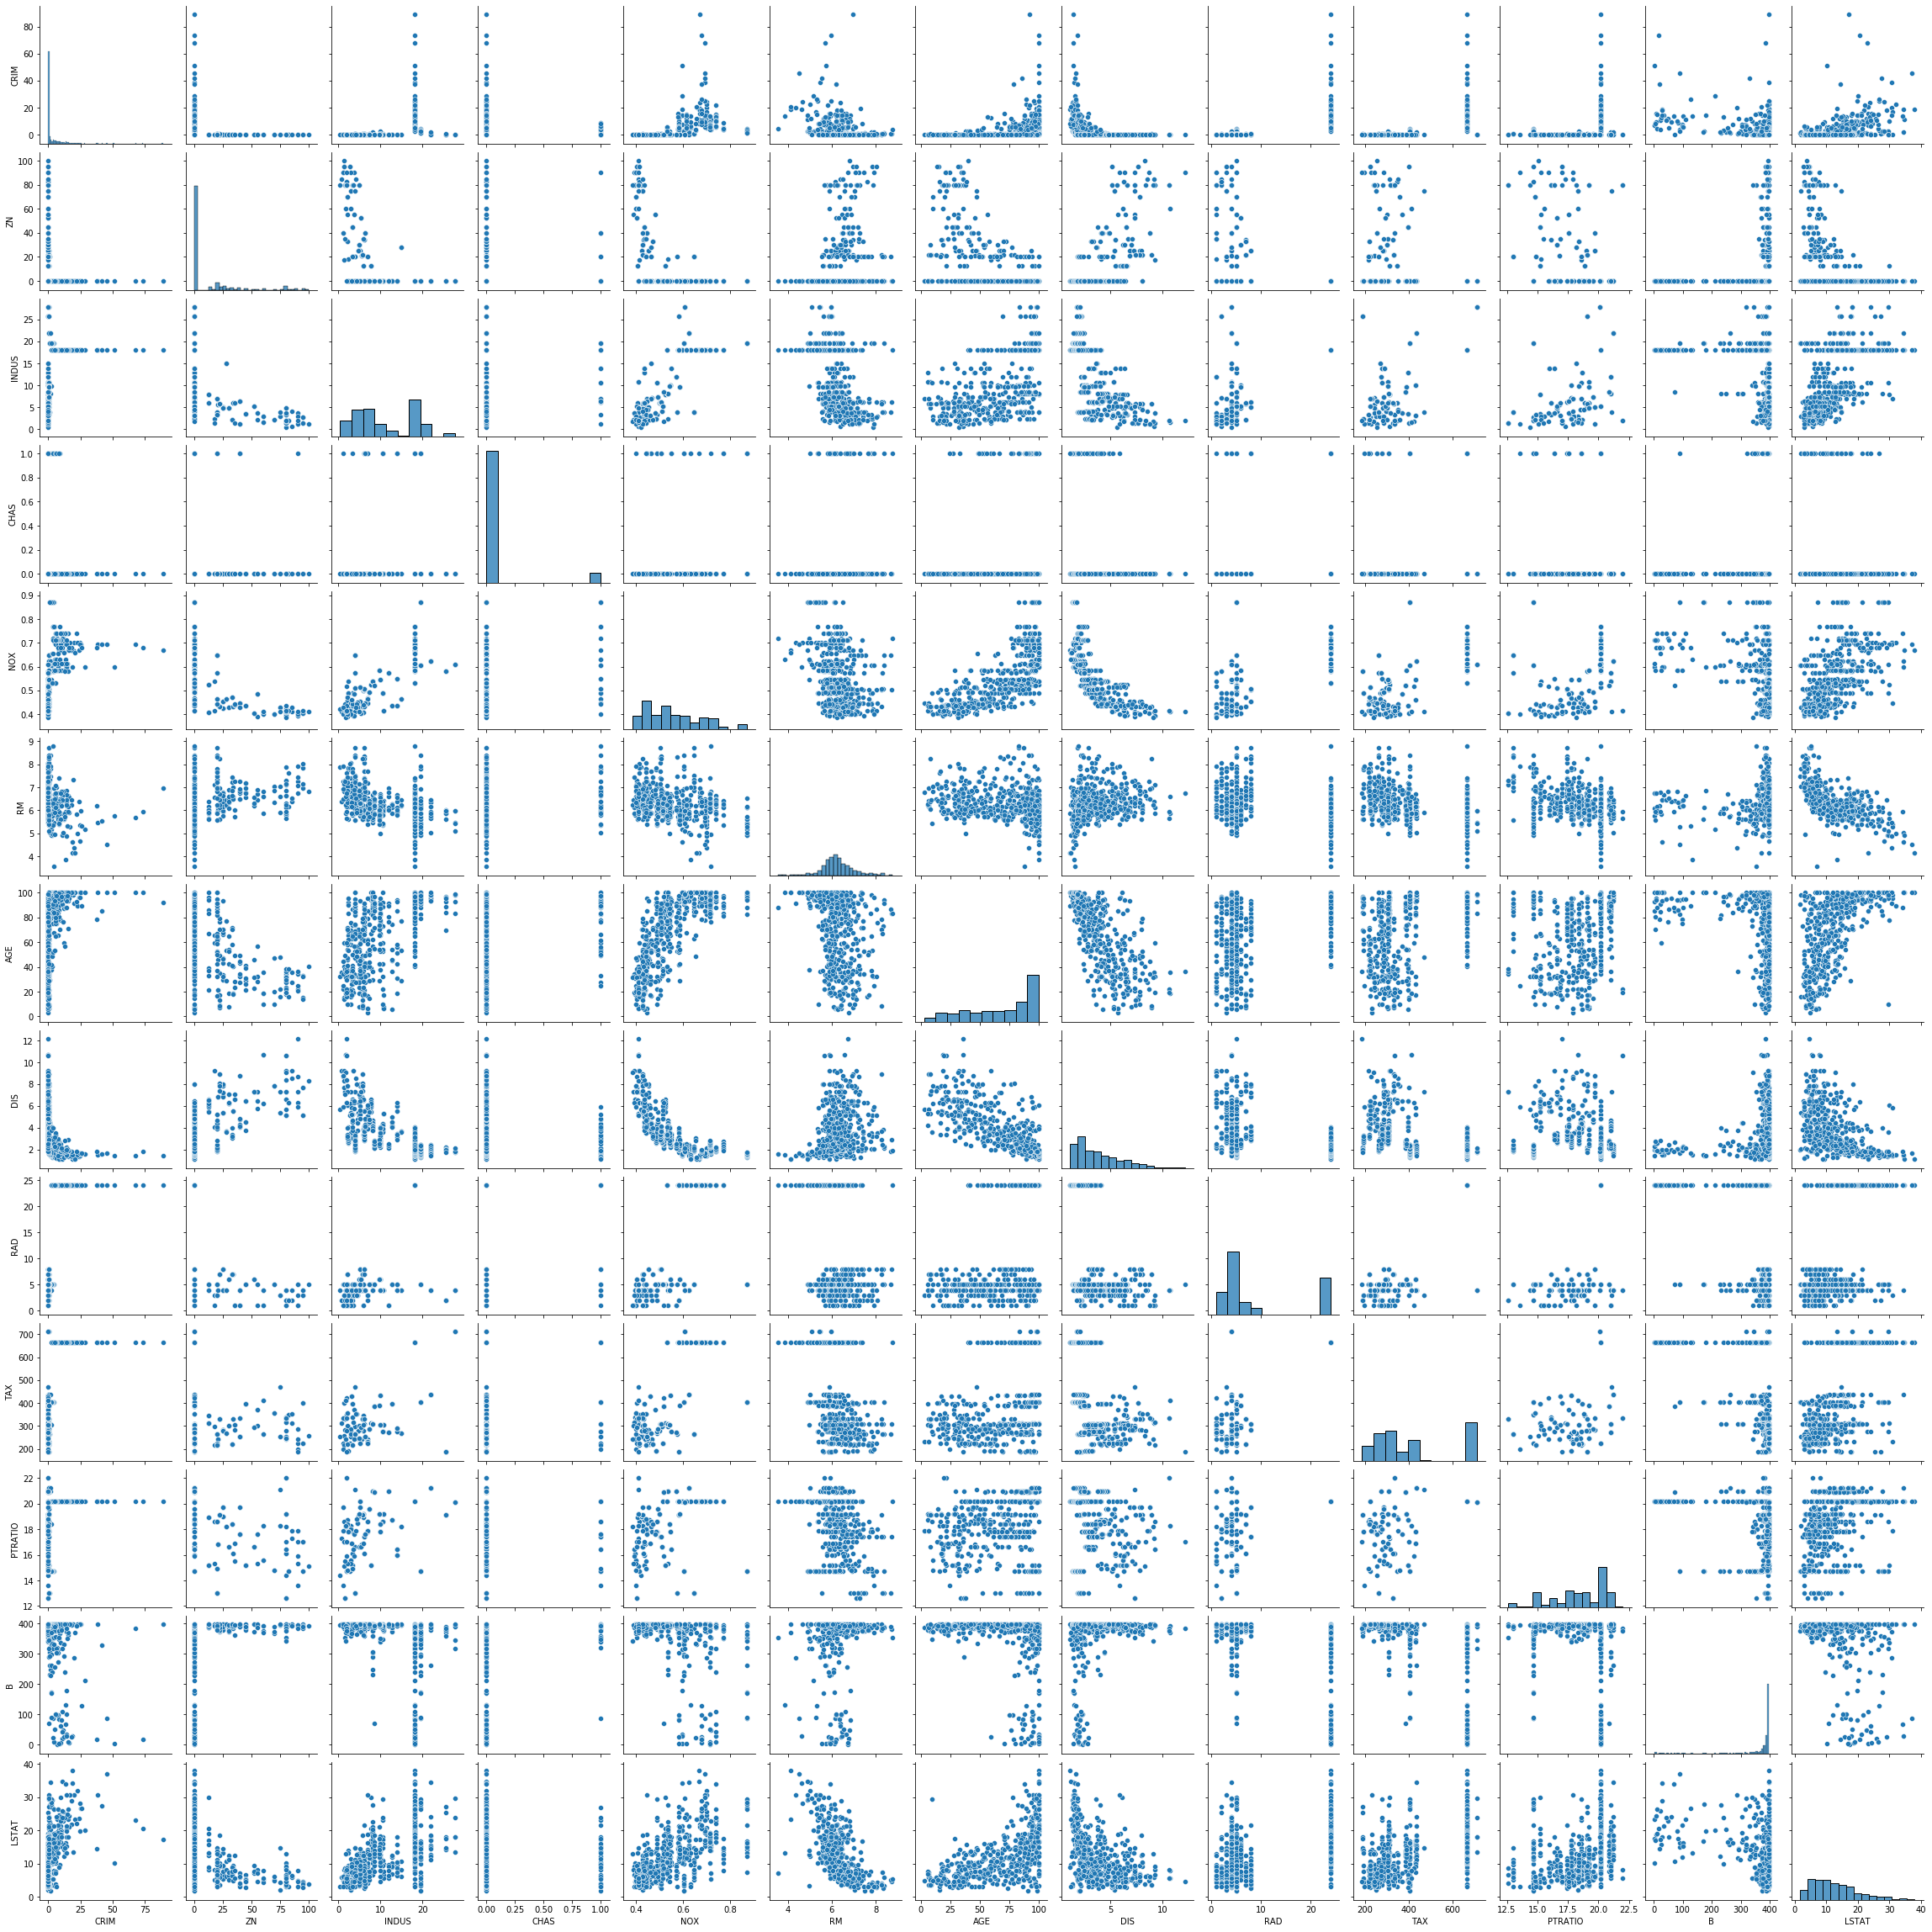

In [64]:
# Visualize data for each feature (pairplot,distplot)
sns.pairplot(df_boston)

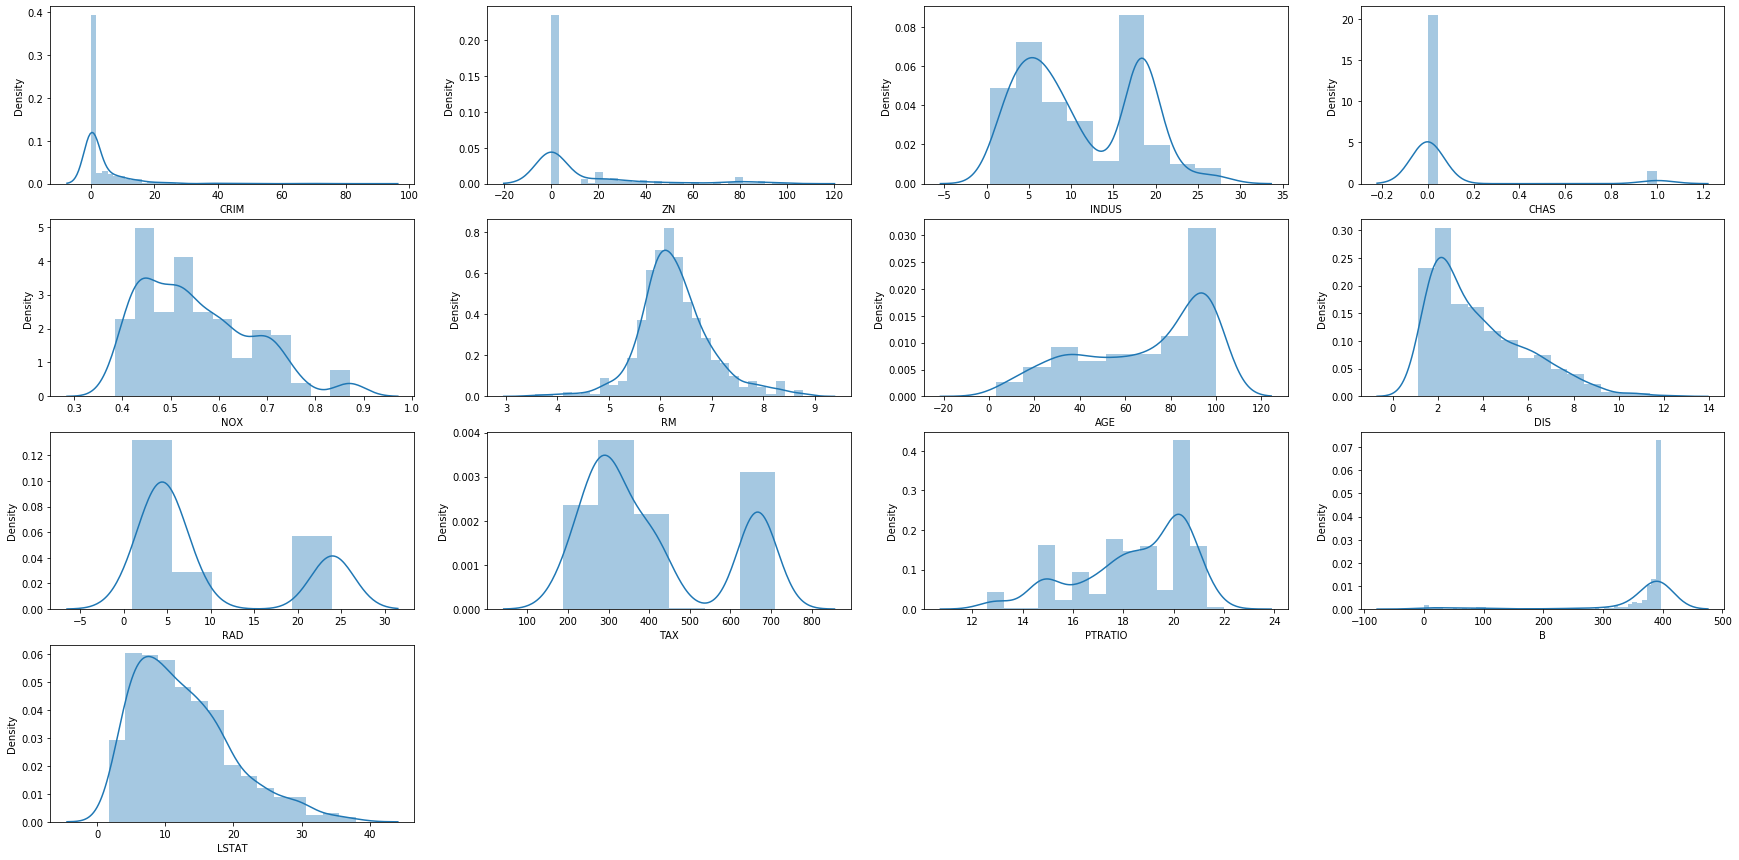

In [65]:
plt.subplots(figsize=(30,15))
for i, column in enumerate(df_boston.columns, 1):
    plt.subplot(4,4,i)
    sns.distplot(df_boston[column])

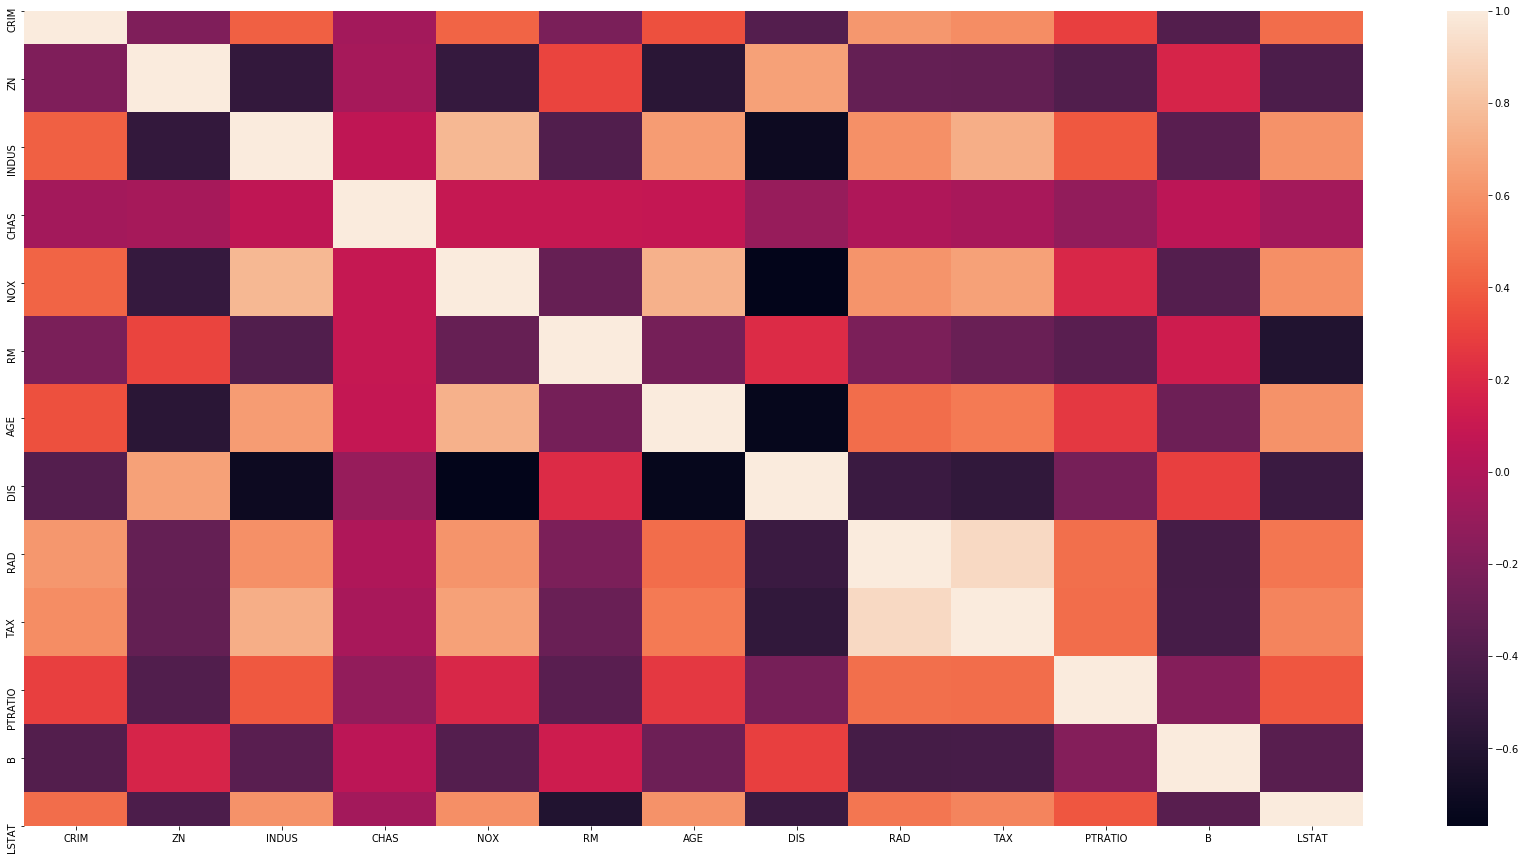

In [66]:
# Draw correlation matrix
plt.subplots(figsize=(30,15))
sns.heatmap(df_boston.corr())

In [67]:
# Drop correlated features (check correlation matrix)
del df_boston['TAX']
del df_boston['RAD']
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,18.7,396.90,5.33


In [68]:
# Handle outliers (you can use IsolationForest)
from sklearn.ensemble import IsolationForest

model=IsolationForest()
model.fit(df_boston)
df_boston['outlier_score_df']=model.decision_function(df_boston)

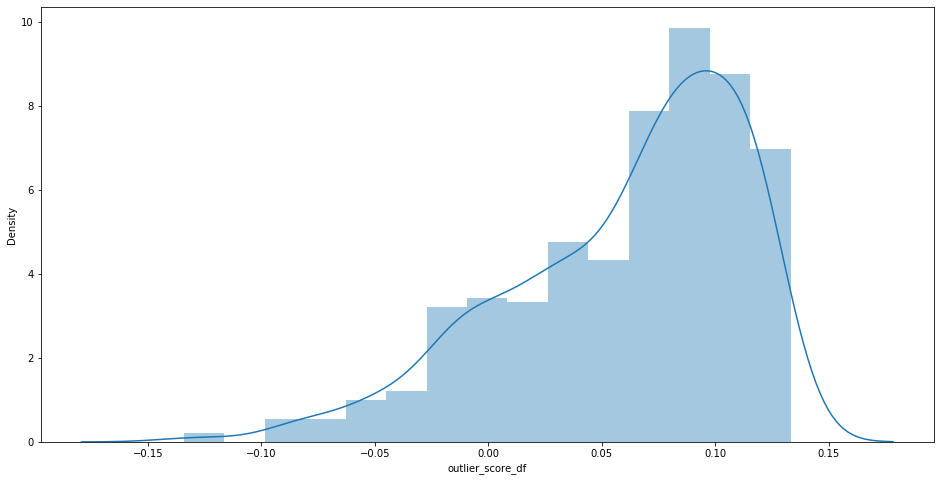

In [69]:
plt.figure(figsize=(16, 8))
sns.distplot(df_boston["outlier_score_df"])

In [74]:
#Outliers are removed
X_new=df_boston[df_boston['outlier_score_df']>0]
y_new = y[list(X_new.index)]

In [75]:
print(X_new.shape)
print(len(y_new))

(430, 12)
430


In [76]:
#Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X_new)
X_scaled

array([[0.00000000e+00, 2.00000000e-01, 5.81481481e-02, ...,
        1.00000000e+00, 9.83656174e-02, 5.12492299e-01],
       [5.05504435e-04, 0.00000000e+00, 2.34444444e-01, ...,
        1.00000000e+00, 2.24273608e-01, 9.59296926e-01],
       [5.05022773e-04, 0.00000000e+00, 2.34444444e-01, ...,
        9.89737254e-01, 6.96125908e-02, 7.66421123e-01],
       ...,
       [1.31108439e-03, 0.00000000e+00, 4.14444444e-01, ...,
        1.00000000e+00, 1.18341404e-01, 6.70694707e-01],
       [2.48706255e-03, 0.00000000e+00, 4.14444444e-01, ...,
        9.91300620e-01, 1.43765133e-01, 6.98750494e-01],
       [9.89574904e-04, 0.00000000e+00, 4.14444444e-01, ...,
        1.00000000e+00, 1.86138015e-01, 8.37649261e-01]])

In [77]:
# Split dataset into train and test set
from sklearn.model_selection import train_test_split, cross_validate
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_new, test_size=0.3, random_state=42)

In [80]:
# Import ridge and lasso models from sklearn
from sklearn.linear_model import Ridge,Lasso

alpha_list=[0.001,0.01,0.05,0.1,1]

In [81]:
# Define 5 different alpha values for lasso and fit them. Print their R^2 sore on both
# train and test.

for alpha in alpha_list:
    lasso_model = Lasso(alpha = alpha)
    lasso_model.fit(X_train, y_train)
    print("alpha: ", alpha)
    print("Lasso Train: ", lasso_model.score(X_train, y_train))
    print("Lasso Test: ", lasso_model.score(X_test, y_test))
    print('*************************')

alpha:  0.001
Lasso Train:  0.7696144831294467
Lasso Test:  0.7749654320179655
*************************
alpha:  0.01
Lasso Train:  0.7683226284758786
Lasso Test:  0.7752045389274141
*************************
alpha:  0.05
Lasso Train:  0.741683230034321
Lasso Test:  0.7456749435023302
*************************
alpha:  0.1
Lasso Train:  0.7071683699578288
Lasso Test:  0.7070137835187588
*************************
alpha:  1
Lasso Train:  0.22982695667299124
Lasso Test:  0.22444454336768538
*************************


In [84]:
# Define 5 different alpha values for Ridg and fit them. Print their R^2 sore on both
# train and test.

for alpha in alpha_list:
    ridge_model = Ridge(alpha = alpha)
    ridge_model.fit(X_train, y_train)
    print("alpha: ", alpha)
    print("Ridge Train: ", ridge_model .score(X_train, y_train))
    print("Ridge Test: ", ridge_model .score(X_test, y_test))
    print('*************************')

alpha:  0.001
Ridge Train:  0.7696275259203148
Ridge Test:  0.7747600664681553
*************************
alpha:  0.01
Ridge Train:  0.7696260414393232
Ridge Test:  0.7749236421287558
*************************
alpha:  0.05
Ridge Train:  0.769590919049474
Ridge Test:  0.7756023147278073
*************************
alpha:  0.1
Ridge Train:  0.769485194348504
Ridge Test:  0.7763452971649296
*************************
alpha:  1
Ridge Train:  0.76039278923446
Ridge Test:  0.7768010358795422
*************************


In [83]:
# Make comment about results. Print best models coefficient.
lasso_model = Lasso(alpha = 0.001)
lasso_model.fit(X_train, y_train)
lasso_model.coef_

array([ -3.19598174,  -4.45198513,  -3.72080192,  -6.90059448,
        -8.76641318,  17.53053272,   1.7646557 , -13.44481524,
        -2.63764886,   8.08741199, -24.15522978, -11.20157507])